# Realiza las siguientes importaciones.


```python
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import os
```



In [64]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

import os

# Lectura del archivo:

```python
path = '/content/drive/MyDrive/UPGRADE_HUB_BOOTCAMP/DATA/' 
# cambia tu path por el de tu drive o ruta en el ordenador

nombre_archivo = 'madfhantr.csv'

data = pd.read_csv(os.path.join(path, nombre_archivo))
```

In [65]:
path = ''r'C:\Users\luisx\Downloads' 
# cambia tu path por el de tu drive o ruta en el ordenador

nombre_archivo = 'madfhantr.csv'

data = pd.read_csv(os.path.join(path, nombre_archivo))

## Trabajo con NA´s 


---



1.   Obtén el número de valores faltantes por columna, buscamos el siguiente Output:
```
Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64
```
2.   Obtén una lista con los nombres de dichas columnas. (No vale hardcodear).
```
[
    'Credit_History',
    'Self_Employed',
    'LoanAmount',
    'Dependents',
    'Loan_Amount_Term',
    'Gender',
    'Married'
 ]
```
3. Obtén una Serie de tipos:
```
Credit_History      float64
Self_Employed        object
LoanAmount          float64
Dependents           object
Loan_Amount_Term    float64
Gender               object
Married              object
dtype: object
```

4. Selecciona aquellas columnas donde la desviación típica sea mayor que 1. Deberás obtener lo siguiente:
```
['LoanAmount', 'Loan_Amount_Term']
```

5. Estudia el comportamiento de dichas variables (**Matemática y gráficamente**). ¿Se podría aplicar alguna transformación? En caso de ser así, ¿Cuál y por qué?. Piense bien a qué variable aplicar qué transformación. 

* Realice la siguiente gráfica e interprétela, para ello, use los contenidos vistos en la clase de `Seaborn` y `Matplotlib`.

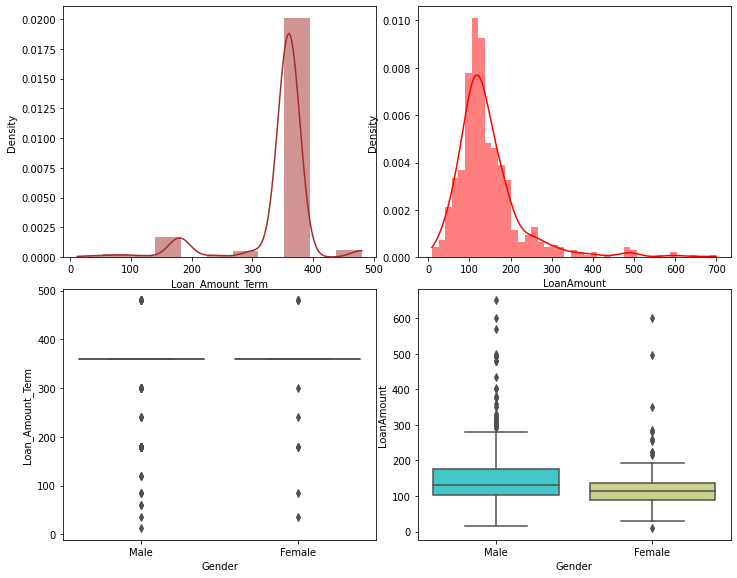


Antes de nada, aplique la función que se programó el día anterior, que permitía llevar los Outliers a los límites inferiores y superiores de la variable, de manera que el comportamiento de la variable se resuma en:
$$
[Q1 - 1.5 ICR, \ Q3 + 1.5ICR]
$$

```python
def detectar_outliers(data: pd.DataFrame, columnas_limpiar: list) -> pd.DataFrame:
    """Esta función recibe un dataframe y una serie de columnas 
    sobre las que se quiere hacer un tratamiento de las variables
    de tipo numérico.

    Args:
        data (pd.DataFrame): Dataframe sobre el que se quiere hacer el tratamiento.
        columnas_limpiar list[str]: lista de strings con las columnas que se quieren limpiar.

    Returns:
        pd.DataFrame: Dataframe con las columnas limpias.
        
    Usage:
    
    >>> df = pd.DataFrame({'A': [1, 2, 3, 4, 5], 'B': [1, 2, 3, 4, 5]})
    >>> detectar_outliers(df, ['A', 'B'])
    """
    import numpy as np
    
    try:

        assert(any(data[columnas_limpiar].dtypes.values != 'float64') == False)
        
        for variable in columnas_limpiar:
            
            # calcula Q1 y Q3.
            Q1 = data[variable].quantile(0.25)
            Q3 = data[variable].quantile(0.75)
            
            # Rango Intercuartíl.
            IQR = Q3 - Q1
            
            # calcula los límites de los outliers.
            upper_limit = Q3+1.5*IQR
            lower_limit = Q1-1.5*IQR
            
            # Genera un vector con los nuevos valores de la variable.
            eliminar_outliers = np.where(
                data[variable] > upper_limit, upper_limit,
                    np.where(
                        data[variable] < lower_limit, lower_limit, data[variable]
                            )
                    )
            
            # Reemplaza los valores de la variable por los nuevos.
            data[variable] = eliminar_outliers
            
    except:
        
        raise Exception('Alguna variable no es de tipo float.')
```
Aplique esta función a las columnas numéricas que considere.


6. Obtén la siguiente gráfica:

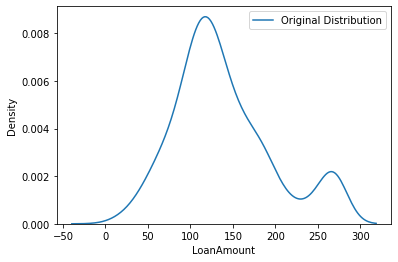


7. Prueba a graficar diversas imputaciones de datos, ¿Cuál se ajusta mejor a la distribución original? Imputa la variable mediante dicha imputación.

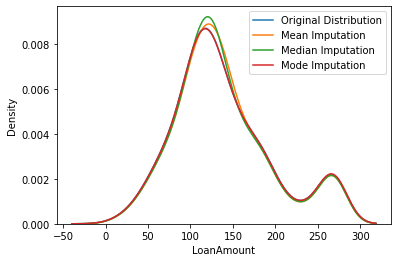


> Lea la documentación del siguiente imputer (KNN Imputer) https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html

> ¿Se le ocurre alguna forma que permita gráficar la imputación por el algoritmo de KNN conforme vamos variando el número de vecinos?


### Valores Nulos.Respuestas

In [66]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Selección de columnas con valores nulos

In [67]:
null_values= data.isnull().sum().sort_values(ascending= False)
null_values[null_values > 0]

Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64

### Lista con columnas que tienen valores nulos

In [70]:
null_list = null_values[null_values > 0].index.to_list()
#.index, muestra los indices del df
# .to_list, tranforma los indices que obtuvimos y los transforma en lista 

null_list

['Credit_History',
 'Self_Employed',
 'LoanAmount',
 'Dependents',
 'Loan_Amount_Term',
 'Gender',
 'Married']

### Tipo de dato en cada columna

In [58]:
data[null_list].dtypes


Credit_History      float64
Self_Employed        object
LoanAmount          float64
Dependents           object
Loan_Amount_Term    float64
Gender               object
Married              object
dtype: object

### Columnas de tipo float64 con std > 1 

In [125]:
data[null_list].describe()

,Credit_History,LoanAmount,Loan_Amount_Term
count,564.000000,592.000000,600.00000
mean,0.842199,146.412162,342.00000
std,0.364878,85.587325,65.12041
min,0.000000,9.000000,12.00000
25%,1.000000,100.000000,360.00000
50%,1.000000,128.000000,360.00000
75%,1.000000,168.000000,360.00000
max,1.000000,700.000000,480.00000


In [123]:
null_values_std = data[null_list].describe().T['std']
# T, transpone el dF, por el atributo que le indicamos ['std'] 

null_values_std[null_values_std > 1].index.to_list()

['LoanAmount', 'Loan_Amount_Term']

### Gráficas

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

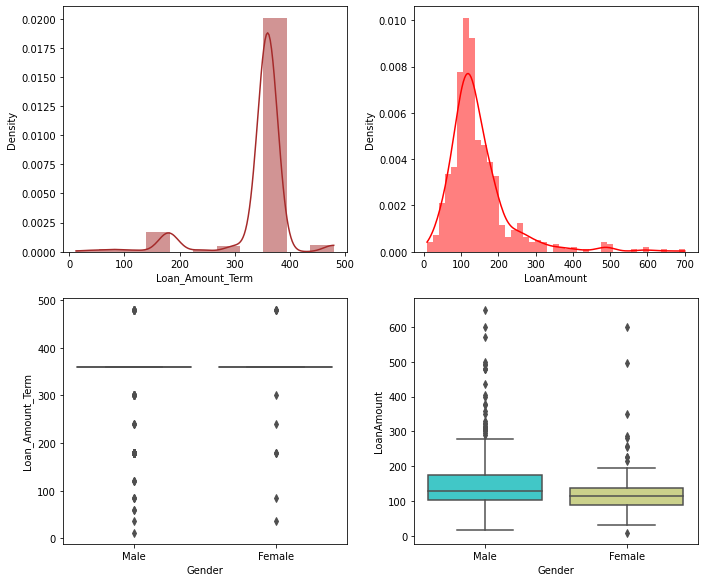

In [135]:
fig, axes = plt.subplots(2, 2, figsize=(10,8))

fig.tight_layout()

sns.histplot(data['LoanAmount'], color="red", label="100% Equities", kde=True, stat="density", linewidth=0, ax = axes[0][1])
sns.histplot(data['Loan_Amount_Term'], color="brown", label="100% Equities", kde=True, stat="density", linewidth=0, ax = axes[0][0])

fig.tight_layout()

sns.boxplot(x="Gender", y="Loan_Amount_Term", data=data,palette='rainbow', ax = axes[1][0])
sns.boxplot(x="Gender", y="LoanAmount", data=data,palette='rainbow')

### FIFA 19

In [147]:
path = ''r'C:\Users\luisx\Downloads' 
# cambia tu path por el de tu drive o ruta en el ordenador

nombre_archivo = 'fifa19_prep.csv'

data_fifa = pd.read_csv(os.path.join(path, nombre_archivo))

In [165]:
data_fifa['Position'].unique()

array(['Forward', 'Middle', 'Goalkeeper', 'Defense'], dtype=object)

### cantidad de jugadores por nación

In [170]:
nation_count = data_fifa['Nationality'].value_counts().reset_index().set_index('index').head(20).rename(columns={'Nationality': 'Count'})

nation_count


,Count
index,
Spain,220
England,104
Italy,103
France,59
Brazil,56
Argentina,54
Germany,26
Belgium,25
Netherlands,24


In [172]:
data_fifa['Nationality'].value_counts()

Spain             220
England           104
Italy             103
France             59
Brazil             56
                 ... 
Australia           1
Kenya               1
Armenia             1
Korea Republic      1
Burkina Faso        1
Name: Nationality, Length: 78, dtype: int64

C:\Users\luisx\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


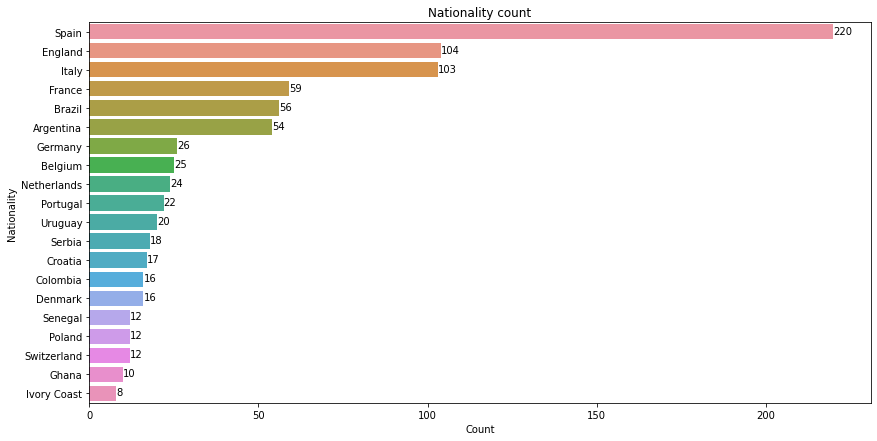

In [171]:
fig, ax = plt.subplots(figsize=(14,7))
 
sns.barplot(nation_count['Count'], nation_count.index)
for i,j in enumerate(nation_count['Count']):
 ax.text(j, i+0.1, str(j))
 
 
plt.xlabel('Count')
plt.ylabel('Nationality')
plt.title('Nationality count')
plt.show()